In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import math

In [4]:
questions = pd.read_csv("Questions.csv", encoding='latin1')
answers = pd.read_csv("Answers.csv", encoding='latin1')
tags = pd.read_csv("Tags.csv", encoding='latin1')

In [27]:
questions.head()


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [71]:
answers['Body'][0]

'<p><a href="http://svnbook.red-bean.com/">Version Control with Subversion</a></p>\r\n\r\n<p>A very good resource for source control in general. Not really TortoiseSVN specific, though.</p>'

In [25]:
answers.info()
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
Id              int64
OwnerUserId     float64
CreationDate    object
ParentId        int64
Score           int64
Body            object
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
Id              1264216 non-null int64
OwnerUserId     1249762 non-null float64
CreationDate    1264216 non-null object
ClosedDate      55959 non-null object
Score           1264216 non-null int64
Title           1264216 non-null object
Body            1264216 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [28]:
ans_per_question = collections.Counter(answers['ParentId'])
answerid,noAnswers= zip(*ans_per_question.most_common())
text = "Avegrage number of answers per question ",np.mean(noAnswers)



(408,
 316,
 129,
 100,
 69,
 67,
 61,
 59,
 55,
 51,
 50,
 49,
 45,
 43,
 43,
 42,
 41,
 40,
 40,
 40,
 39,
 39,
 38,
 38,
 38,
 37,
 36,
 36,
 36,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 

In [40]:
noAnswers



(408,
 316,
 129,
 100,
 69,
 67,
 61,
 59,
 55,
 51,
 50,
 49,
 45,
 43,
 43,
 42,
 41,
 40,
 40,
 40,
 39,
 39,
 38,
 38,
 38,
 37,
 36,
 36,
 36,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 

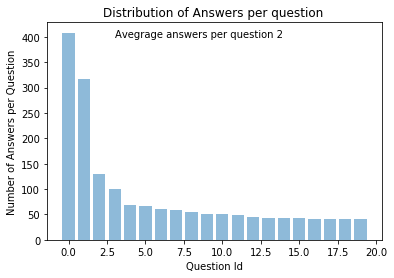

In [36]:
N=20
plt.bar(range(N), noAnswers[:N], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)

plt.ylabel('Number of Answers per Question')
plt.xlabel('Question Id')
plt.title('Distribution of Answers per question ')
plt.text(3,400,"Avegrage answers per question "+str(math.ceil((np.mean(noAnswers)))))

plt.show()

In [41]:
print("Top 2 Questions with maximum number of answers \n")
qid = answerid[:2] 

for b,id in zip(questions['Body'],questions['Id']):
    if id in qid:
        #print(id)
        print(b)
        print("................")


Top 2 Questions with maximum number of answers 

<p>This is a <a href="http://stackoverflow.com/questions/tagged/polls">poll</a> asking the Stackoverflow community what <strong>non-programming</strong> books they would recommend to fellow programmers.</p>

<h3>Please read the following before posting:</h3>

<ul>
<li><p>Please post only <em>ONE BOOK PER ANSWER</em>.</p></li>
<li><p>Please <em>search for your recommendation on this page before posting</em> (there are over NINE PAGES so it is advisable to check them all). Many books have already been suggested and we want to avoid duplicates. If you find your recommendation is already present, vote it up or add some commentary.</p></li>
<li><p><strong>Please elaborate</strong> <em>on <strong>why</strong> you think a given book is worth reading</em> <strong><em>from a programmer's perspective.</em></strong></p></li>
</ul>

<p>Note: <a href="http://stackoverflow.com/questions/31274/best-non-development-book-for-software-developers">this art

In [53]:
ans=zip(answers['Body'],answers['ParentId'])
ans=list(ans)


In [54]:
ans[90]

('<p>It\'s called <a href="http://en.wikipedia.org/wiki/Alpha_compositing">alpha blending</a>.</p>\r\n\r\n<p>In psuedocode, assuming the background color (blend) always has 255 alpha. Also assumes alpha is 0-255.</p>\r\n\r\n<pre><code>alpha=argb.alpha()<br>r = (alpha/255)*argb.r() + (1 - alpha/255)*blend.r()<br>g = (alpha/255)*argb.g() + (1 - alpha/255)*blend.g()<br>b = (alpha/255)*argb.b() + (1 - alpha/255)*blend.b()<br></code></pre>\r\n\r\n<p><em>note: you probably need to be a bit (more) careful about floating-point/int math and rounding issues, depending on language. Cast intermediates accordingly</em></p>\r\n\r\n<p><strong>Edited to add:</strong></p>\r\n\r\n<p>If you don\'t have a background color with an alpha of 255, the algebra gets alot more complicated. I\'ve done it before and it\'s a fun exercise left to the reader (if you really need to know, ask another question :). </p>\r\n\r\n<p>In other words, what color C blends into some background the same as blending A, then blendi

In [69]:
x=zip(answers['ParentId'],questions['Id'])
x=list(x)
x[:10]

[(90, 80),
 (80, 90),
 (180, 120),
 (260, 180),
 (260, 260),
 (330, 330),
 (260, 470),
 (260, 580),
 (470, 650),
 (180, 810)]

In [65]:
questions['Body'][2]

"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n"

In [70]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [78]:
xx=list(answers[answers['ParentId']==90]['Body'])

In [79]:
xx[1]

'<p>You can also try <em><a href="http://www.codeproject.com/KB/work/XTortoiseSVN.aspx" rel="nofollow">Version Control for the Standalone Programmer - Part 1</a></em> or perhaps <em><a href="http://www.kenegozi.com/Blog/2007/07/30/merging-with-tortoisesvn.aspx" rel="nofollow">Merging with TortoiseSVN</a></em>.</p>\n'